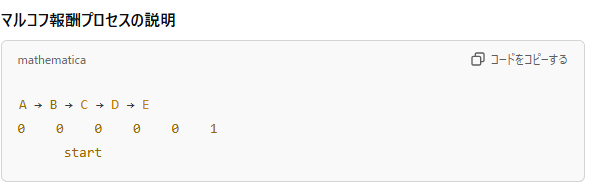


In [4]:
import numpy as np

# MRP環境の定義
class MRP:
    def __init__(self):
        self.states = ['A', 'B', 'C', 'D', 'E']  # 状態空間
        self.start_state = 'C'  # 初期状態
        self.terminal_states = ['A', 'E']  # 終端状態
        self.rewards = {'E': 1, 'A': 0}  # 報酬
        self.transition_prob = 0.5  # 左右への遷移確率

    def step(self,state):
        if state in self.terminal_states:
            return state, 0
        idx = self.states.index(state)
        if np.random.rand() < self.transition_prob:
            nex_state = self.states[max(0, idx - 1)]
        else:
            nex_state = self.states[min(len(self.states) - 1, idx + 1)]
        reward = self.rewards.get(nex_state, 0)
        return nex_state, reward
    
    def reset(self):
        return self.start_state

TD(0)法

In [6]:
def td_zero(env,alpha=0.1,gamma=1.0,episodes=500):
    V = {state:0 for state in env.states}
    for _ in range(episodes):
        state = env.reset()
        while state not in env.terminal_states:
            next_state, reward = env.step(state)
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            state = next_state
    return V

Monte Carlo法

In [21]:
def monte_carlo(env, alpha=0.1, gamma=1.0, episodes=500):
    V = {state: 0 for state in env.states}  # 初期化（全状態の価値を0に設定）
    returns = {state: [] for state in env.states}  # 各状態のリターンを保存
    for _ in range(episodes):
        state = env.reset()
        episode = []
        
        # エピソードを生成
        while state not in env.terminal_states:
            next_state, reward = env.step(state)
            episode.append((state, reward))
            state = next_state
        episode.append((state, 0))  # 終端状態を追加

        # 各状態に対してリターンを計算し、価値を更新
        G = 0  # リターン
        visited_states = set()
        for state, reward in reversed(episode):
            G = reward + gamma * G
            if state not in visited_states: 
                visited_states.add(state)       
                V[state] += alpha * (G - V[state])  # 定数ステップサイズによる更新
    return V
    



In [22]:
# TD(0)法による学習
td_values = td_zero(env, alpha=0.1, episodes=1000)
if td_values is None:
    print("TD(0)関数が正しい結果を返していません！")
else:
    print("TD(0)による状態価値:")
    for state, value in td_values.items():
        print(f"{state}: {value:.2f}")

# Monte Carlo法による学習
mc_values = monte_carlo(env, alpha=0.1, episodes=1000)
if mc_values is None:
    print("Monte Carlo関数が正しい結果を返していません！")
else:
    print("\nMonte Carlo法による状態価値:")
    for state, value in mc_values.items():
        print(f"{state}: {value:.2f}")


TD(0)による状態価値:
A: 0.00
B: 0.25
C: 0.48
D: 0.72
E: 0.00

Monte Carlo法による状態価値:
A: 0.00
B: 0.19
C: 0.36
D: 0.72
E: 0.00
